In [90]:
import numpy as np
np.random.seed(5)

import matplotlib.pyplot as plt

import pandas as pd
import datetime


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [91]:
def generate_time_serie(n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, 1)
    time = np.linspace(0, 1, n_steps)
    serie = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    serie += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    serie += 0.1 * (np.random.rand(n_steps) - 0.5)   # + noise
    return serie.astype(np.float32)

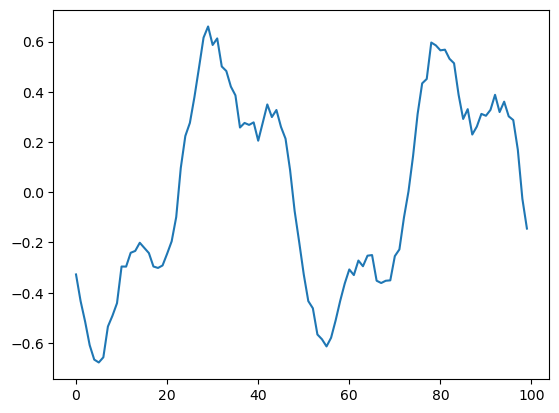

In [92]:
n_steps = 100
s1 = generate_time_serie(n_steps)
plt.plot(s1)

In [93]:
def genera_train(serie, lg_secuencia, lg_y):
    x = []
    y = []
    ultimo = len(serie)-lg_secuencia-lg_y
    for ix in range(ultimo):
        x.append(serie[ix:ix+lg_secuencia])
        y.append(serie[ix+lg_secuencia:ix+lg_secuencia+lg_y])
    return np.array(x), np.array(y)

In [94]:
lg_sec = 50

x, y = genera_train(s1, lg_sec,1)

# Dividir entre train y test
limite = int(len(x) * 0.8)
X_train, y_train = x[:limite], y[:limite]
X_test, y_test = x[limite:], y[limite:]

In [95]:
def plot_serie(serie, lg_sec, y, y_pred ):
  fig=plt.figure(figsize=(15,5))
  plt.plot(serie)
  plt.plot(lg_sec, y, "bo")
  plt.plot(lg_sec, y_pred, "rx")

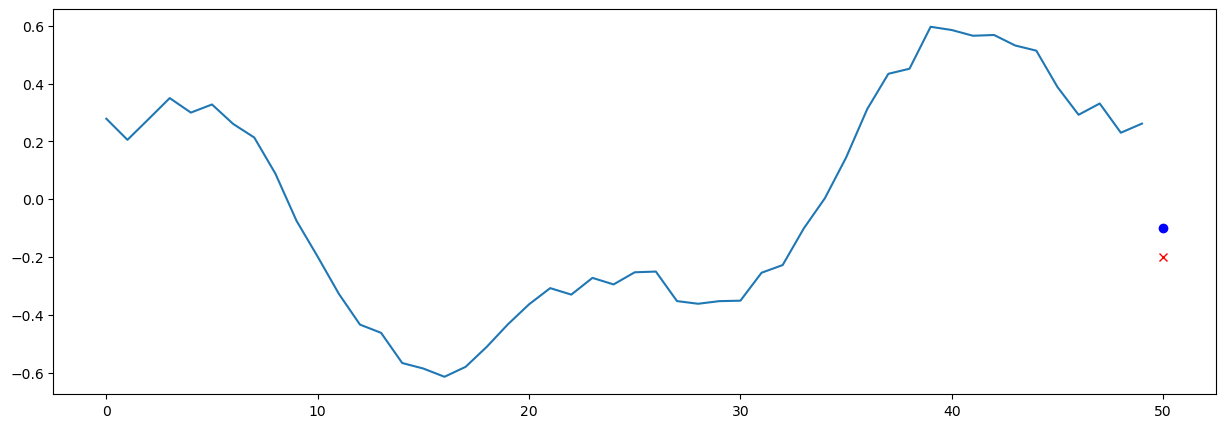

In [96]:
plot_serie(X_test[0], lg_sec, -0.1, -0.2)

In [110]:

def modelo_predice_igual_ultimo(x):
    ret = []
    for e in x:
        ret.append(e[-1])
    return ret

def modelo_regresion_lineal(x):
  ret = []
  for e in x:
    regresor = LinearRegression()
    vx = [[i] for i in range(len(e))]
    vy = [[e[i]] for i in range(len(e))]

    regresor.fit(vx, vy)
    r1 = regresor.predict([[len(e)]])
    ret.append(r1)
  ret = np.concatenate(ret)
  return ret

def modelo_red_densa(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.Input(shape=(lg_sec)),
      keras.layers.Dense(30, activation="relu"),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=100)
  return model

def modelo_red_recurrente_1(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(1, return_sequences=False, input_shape=[None, 1])
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=100)
  return model

def modelo_red_recurrente_2(x_train, y_train, n_neuronas):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(n_neuronas, return_sequences=False, input_shape=[None, 1]),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  
  model.fit(x_train, y_train, epochs=100)
  return model

def modelo_red_recurrente_3(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(50, return_sequences=True, input_shape=[None, 1]),
      keras.layers.SimpleRNN(50, return_sequences=False),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=50)
  return model

rms modelo_predice_igual_ultimo = 0.08301575481891632


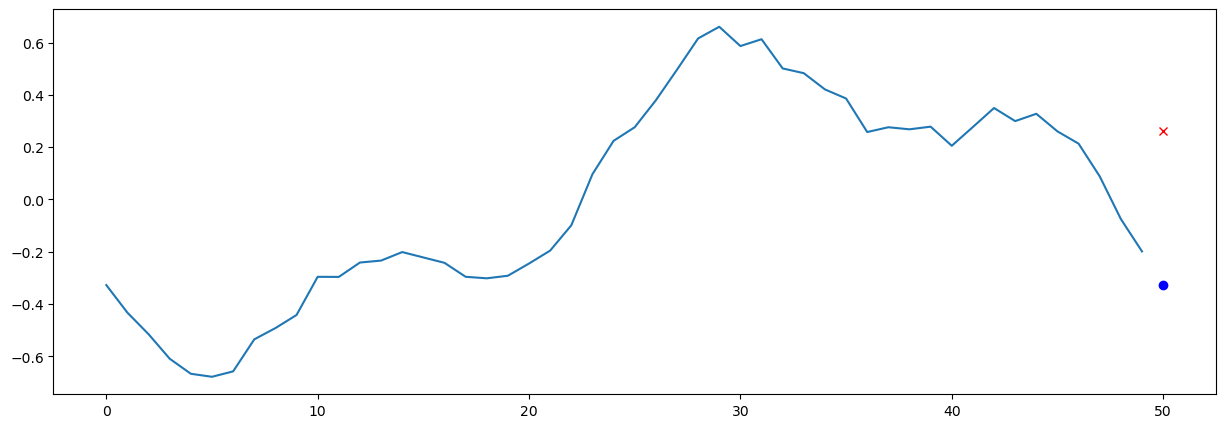

In [98]:
y_pred = modelo_predice_igual_ultimo(X_test)
rms = mean_squared_error(y_test,y_pred,squared=False)
print(f"rms modelo_predice_igual_ultimo = {rms}")
plot_serie(X_train[0],lg_sec, y_train[0],y_pred[0])

rms modelo_regresion_lineal = 0.23966081491032293


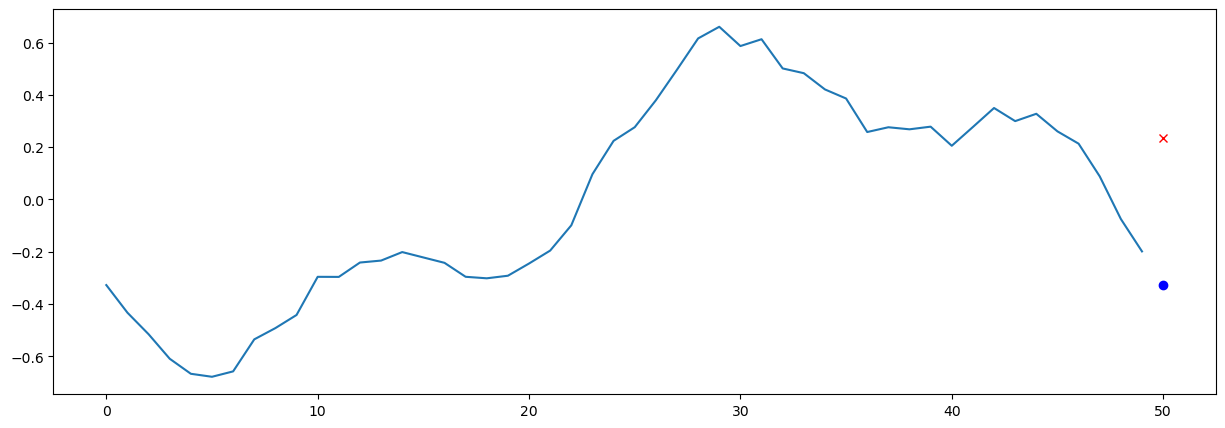

In [99]:
y_pred = modelo_regresion_lineal(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_regresion_lineal = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1158
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 0.0729
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 0.0468
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0291
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 0.0197
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 0.0153
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0130
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 0.0108
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 0.0099
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 0.0089
Epoch 11/100
2/2 [==============================] - 0s 0s/step - loss: 0.0080
Epoch 12/100
2/2 [==============================] - 0s 0s/step - loss: 0.0072
Epoch 13/100
2/2 [==============================] - 0s 0s/step - lo

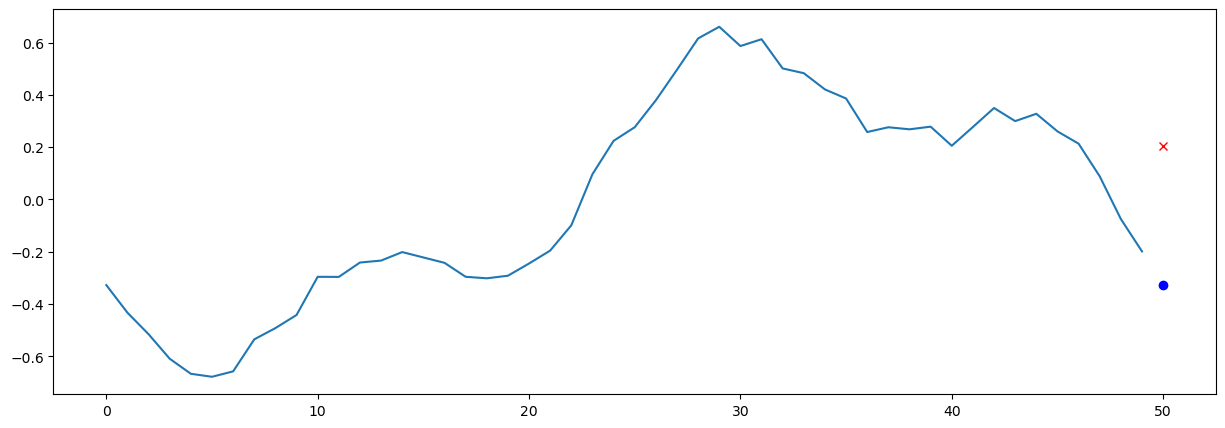

In [100]:
modelo = modelo_red_densa(X_train, y_train)
y_pred = modelo.predict(X_test)
ret = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_densa = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

Epoch 1/100
2/2 [==============================] - 1s 0s/step - loss: 0.8753
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 0.8721
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.8682
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 0.8656
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 0.8629
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 0.8603
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8571
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 0.8542
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 0.8508
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 0.8473
Epoch 11/100
2/2 [==============================] - 0s 0s/step - loss: 0.8444
Epoch 12/100
2/2 [==============================] - 0s 0s/step - loss: 0.8408
Epoch 13/100
2/2 [==============================] - 0s 0s/step - l

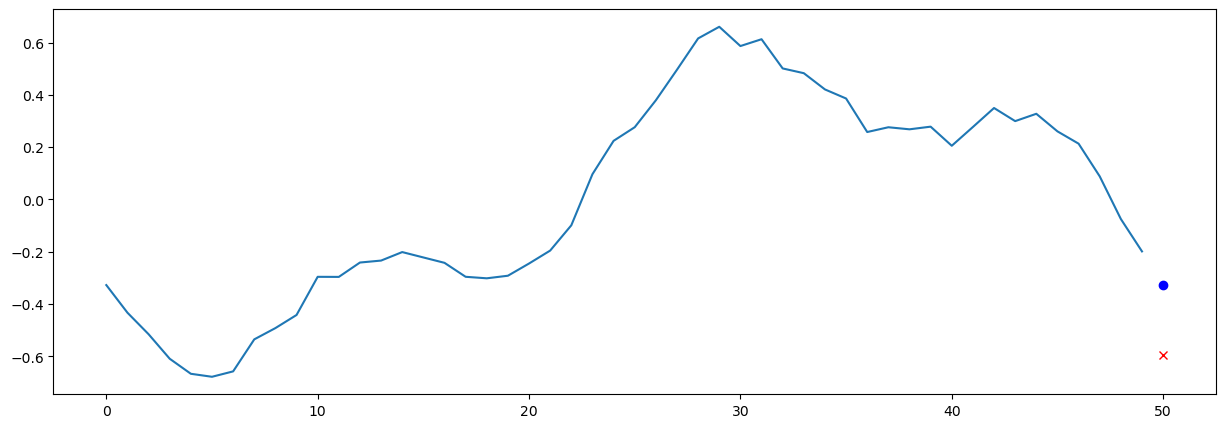

In [101]:
modelo = modelo_red_recurrente_1(X_train, y_train)
y_pred = modelo.predict(X_test)
ret = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_recurrente_1 = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

Epoch 1/100
2/2 [==============================] - 1s 0s/step - loss: 0.1457
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0221
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0074
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0056
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 0.0067
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 11/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0047
Epoch 12/100
2/2 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 13/100
2/2 [==============================] - 0s 11ms

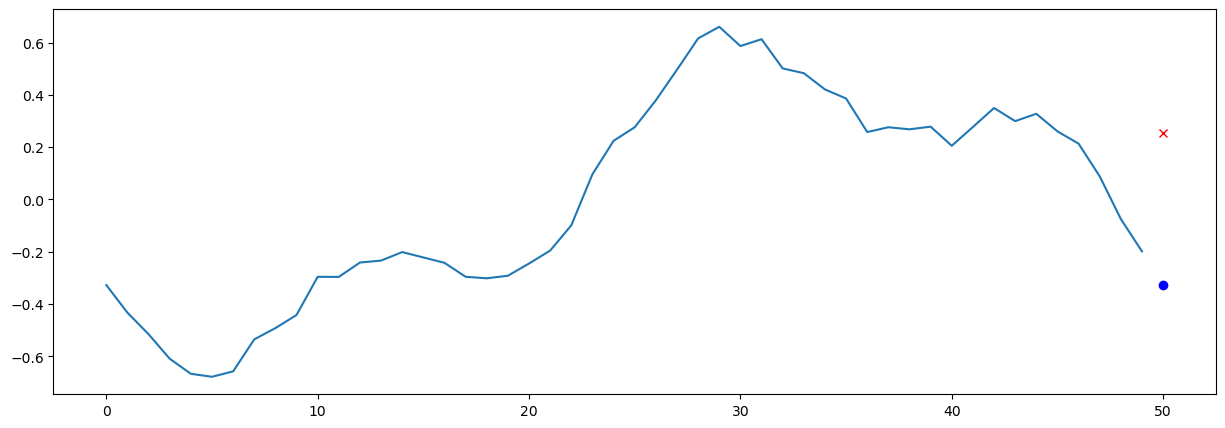

In [106]:
modelo = modelo_red_recurrente_2(X_train, y_train, 40)
y_pred = modelo.predict(X_test)
ret = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_recurrente_1 = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

Epoch 1/50
2/2 [==============================] - 1s 12ms/step - loss: 0.3142
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1367
Epoch 3/50
2/2 [==============================] - 0s 0s/step - loss: 0.0470
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 0.0460
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0489
Epoch 6/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0145
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 8/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0240
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 0.0207
Epoch 10/50
2/2 [==============================] - 0s 0s/step - loss: 0.0076
Epoch 11/50
2/2 [==============================] - 0s 16ms/step - loss: 0.0028
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0078
Epoch 13/50
2/2 [==============================] - 0s 21ms/step - los

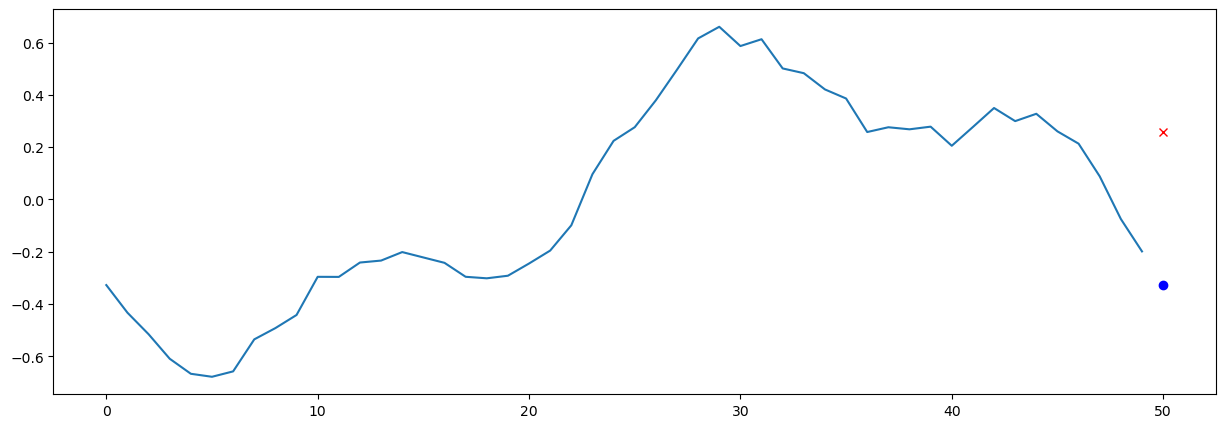

In [111]:
modelo = modelo_red_recurrente_3(X_train, y_train)
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_recurrente_3 = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

In [112]:
# se pueden predecir 10 valores cambiando el valor de lg_y a 10
lg_y = 10
rnn_predice_10 = keras.models.Sequential([
    keras.layers.SimpleRNN(40, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(40),
    keras.layers.Dense(lg_y)
    ])
rnn_predice_10.compile(loss="mse", optimizer="adam")

In [113]:
lg_y = 10

x, y = genera_train(s1, lg_sec,  lg_y)
lim = int((len(x) * 0.8))
X_train, y_train = x[:lim], y[:lim]
X_test, y_test = x[lim:], y[lim:]

In [114]:
rnn_predice_10.fit(X_train, y_train, epochs=60)

Epoch 1/60
1/1 [==============================] - 1s 1s/step - loss: 0.4274
Epoch 2/60
1/1 [==============================] - 0s 0s/step - loss: 0.2856
Epoch 3/60
1/1 [==============================] - 0s 11ms/step - loss: 0.2035
Epoch 4/60
1/1 [==============================] - 0s 17ms/step - loss: 0.1641
Epoch 5/60
1/1 [==============================] - 0s 48ms/step - loss: 0.1408
Epoch 6/60
1/1 [==============================] - 0s 14ms/step - loss: 0.1248
Epoch 7/60
1/1 [==============================] - 0s 13ms/step - loss: 0.1162
Epoch 8/60
1/1 [==============================] - 0s 11ms/step - loss: 0.1085
Epoch 9/60
1/1 [==============================] - 0s 6ms/step - loss: 0.0986
Epoch 10/60
1/1 [==============================] - 0s 20ms/step - loss: 0.0889
Epoch 11/60
1/1 [==============================] - 0s 5ms/step - loss: 0.0808
Epoch 12/60
1/1 [==============================] - 0s 17ms/step - loss: 0.0746
Epoch 13/60
1/1 [==============================] - 0s 16ms/step - l

In [115]:
y_pred = rnn_predice_10.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms rnn_predice_10 = {rms}")
#plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

1/1 [==============================] - 0s 206ms/step
rms rnn_predice_10 = 0.11444257199764252


In [118]:
# por cada valor que proporcione, me devulve 10
lg_y = 10
lg_sec = 1
x, y = genera_train(s1, lg_sec,  lg_y)
lim = int((len(x) * 0.8))
X_train, y_train = x[:lim], y[:lim]
X_test, y_test = x[lim:], y[lim:]

rnn_predice_1_10 = keras.models.Sequential([
    keras.layers.SimpleRNN(40, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(40, return_sequences=True),
    keras.layers.Dense(lg_y)
    ])
rnn_predice_1_10.compile(loss="mse", optimizer="adam")
rnn_predice_1_10.fit(X_train, y_train, epochs=60)

Epoch 1/60
3/3 [==============================] - 1s 352us/step - loss: 0.1493
Epoch 2/60
3/3 [==============================] - 0s 0s/step - loss: 0.1442
Epoch 3/60
3/3 [==============================] - 0s 0s/step - loss: 0.1410
Epoch 4/60
3/3 [==============================] - 0s 0s/step - loss: 0.1393
Epoch 5/60
3/3 [==============================] - 0s 3ms/step - loss: 0.1382
Epoch 6/60
3/3 [==============================] - 0s 3ms/step - loss: 0.1374
Epoch 7/60
3/3 [==============================] - 0s 3ms/step - loss: 0.1367
Epoch 8/60
3/3 [==============================] - 0s 2ms/step - loss: 0.1368
Epoch 9/60
3/3 [==============================] - 0s 4ms/step - loss: 0.1359
Epoch 10/60
3/3 [==============================] - 0s 8ms/step - loss: 0.1362
Epoch 11/60
3/3 [==============================] - 0s 6ms/step - loss: 0.1364
Epoch 12/60
3/3 [==============================] - 0s 0s/step - loss: 0.1354
Epoch 13/60
3/3 [==============================] - 0s 4ms/step - loss: 0.13

In [119]:
y_pred = rnn_predice_10.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0], -1)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms rnn_predice_10 = {rms}")

1/1 [==============================] - 0s 25ms/step
rms rnn_predice_10 = 0.35469627380371094
